In [565]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [566]:
import pandas as pd
import seaborn as sns

# Leemos el Appsset

In [567]:
Apps = pd.read_csv('googleplaystore.csv')
Apps.shape # Filas y columnas que contiene el Appsset

(10841, 13)

In [568]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [569]:
Apps.isnull().sum().sort_values(ascending=False) # Vemos la cantidad de nulos de mayor a menor

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

## Borramos las columnas que no utilizaremos para clasificar

In [570]:
Apps = Apps.drop(columns=["App","Current Ver","Android Ver","Last Updated"], axis=1)

# Comenzamos con el tratado de los datos

## Rating

-Eliminamos las filas donde tenga como nulo Rating

In [571]:
Apps = Apps.dropna(subset=['Rating'])
Apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9367 non-null   object 
 1   Rating          9367 non-null   float64
 2   Reviews         9367 non-null   object 
 3   Size            9367 non-null   object 
 4   Installs        9367 non-null   object 
 5   Type            9367 non-null   object 
 6   Price           9367 non-null   object 
 7   Content Rating  9366 non-null   object 
 8   Genres          9367 non-null   object 
dtypes: float64(1), object(8)
memory usage: 731.8+ KB


In [572]:
Apps.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

Vemos que hay un valor máximo de 19, cosa que es imposible por lo que eliminaremos ese valor

In [573]:
Apps.Rating = Apps.Rating.replace(19.0, np.nan) # Reemplazamos ese 19 por un valor nulo

media = Apps.Rating.dropna().mean() # Reemplazamos el valor nulo por la media de las columnas

Apps.Rating = Apps.Rating.fillna(media) 

Text(0.5, 1.0, 'Distribución del Rating')

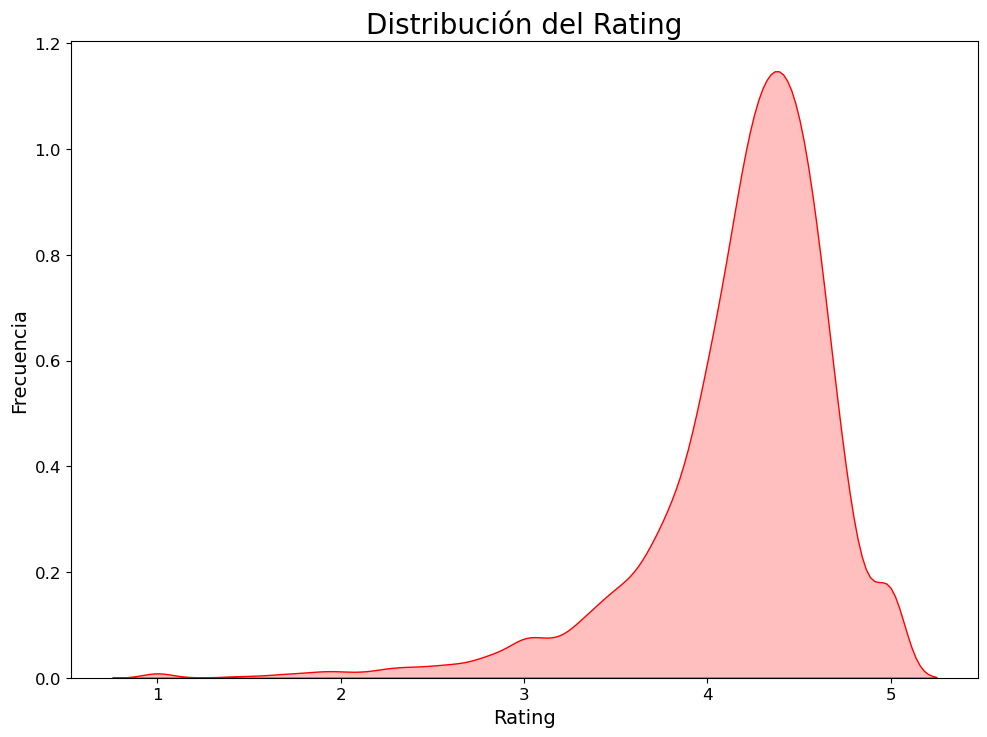

In [574]:
from pylab import rcParams

rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(Apps.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frecuencia")
plt.title('Distribución del Rating',size = 20)

- Hacemos agrupaciones de los valores 

In [575]:
Apps.loc[(Apps['Rating'] >= 0) & (Apps['Rating'] < 0.5)  ,"Rating"]   = 0  # Para valores comprendidos entre 0 y 0.5
Apps.loc[(Apps['Rating'] >= 0.5) & (Apps['Rating'] < 1.5)  ,"Rating"] = 1  # Para valores comprendidos entre 0.5 y 1.5
Apps.loc[(Apps['Rating'] >= 1.5) & (Apps['Rating'] < 2.5)  ,"Rating"] = 2  # Para valores comprendidos entre 1.5 y 2.5
Apps.loc[(Apps['Rating'] >= 2.5) & (Apps['Rating'] < 3.5)  ,"Rating"] = 3  # Para valores comprendidos entre 2.5 y 3.5
Apps.loc[(Apps['Rating'] >= 3.5) & (Apps['Rating'] < 4.5)  ,"Rating"] = 4  # Para valores comprendidos entre 3.5 y 4.5
Apps.loc[(Apps['Rating'] >= 4.5),"Rating"] = 5  # Para valores mayores a 4.5
Apps.value_counts("Rating")

Rating
4.0    5679
5.0    2955
3.0     604
2.0     109
1.0      20
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

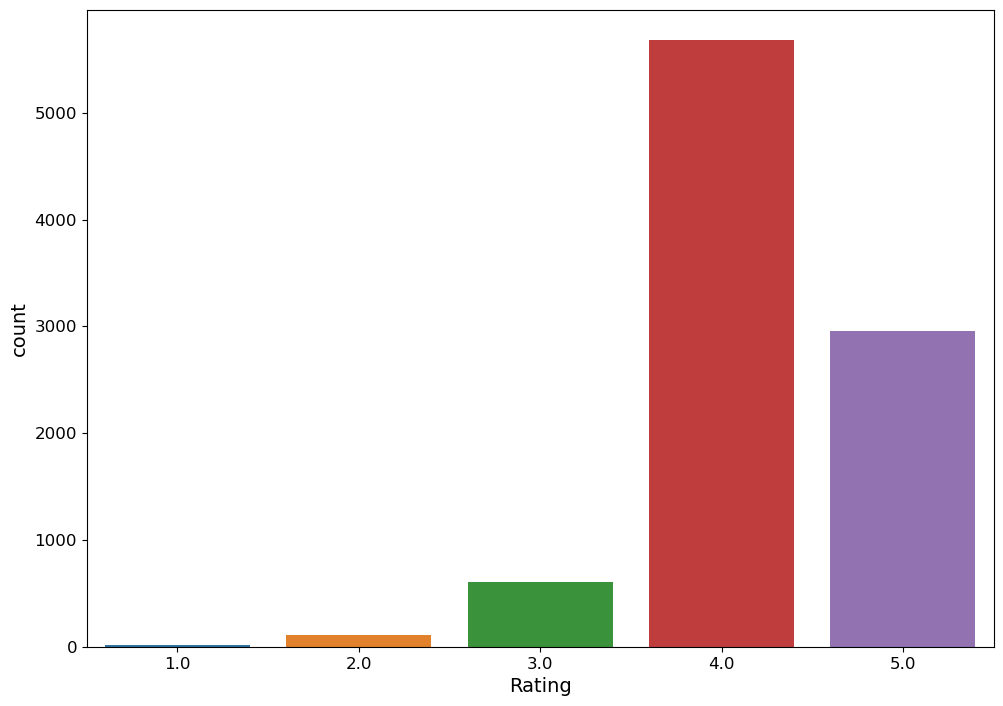

In [576]:
sns.countplot(data=Apps, x="Rating")

# Category

- Vamos a ver la cantidad de generos y las veces que se repiten

In [577]:
print( len(Apps.Category.unique()) , "categorías")

print("\n", Apps.Category.unique())

34 categorías

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


- Vemos que hay un valor erroneo (el 1.9), vamos a eliminarlo

In [578]:
Apps.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
dtype: int64

In [579]:
Apps.dropna(how='any', inplace=True) # Eliminamos los nulos que siguen el el Appsset

Text(0.5, 1.0, 'Apps de cada categoría')

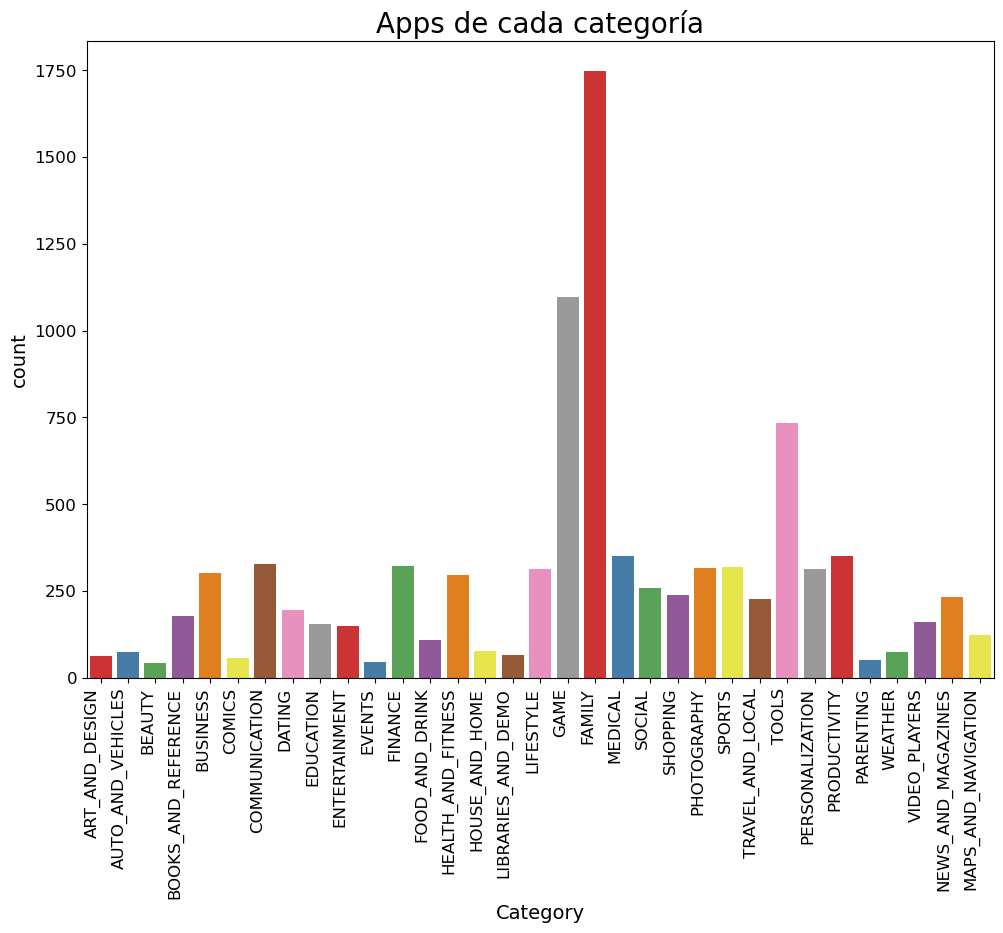

In [580]:
g = sns.countplot(x="Category", data=Apps ,palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Apps de cada categoría',size = 20)

- Para la columna de Category, le aplicaremos un CountFrequencyEncoder ya que es una técnica eficaz para tratar variables con un alto número de categorías

In [581]:
from feature_engine.encoding import CountFrequencyEncoder

encoder = CountFrequencyEncoder(encoding_method='frequency',variables=["Category"]) # Creamos el encoder

encoder.fit(Apps) # Entrenamos el encoder

Apps = encoder.transform(Apps) # Transformamos nuestros datos

Apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0.00662,4.0,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,0.00662,4.0,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,0.00662,5.0,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,0.00662,5.0,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,0.00662,4.0,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


# Reviews

- Codificaremos la columna reviews a int

In [582]:
Apps.Reviews = Apps.Reviews.replace("3.0M", "3000000") # Por errores anteriores reemplazaremos el valor 3.0M por 3 000 000

In [583]:
Apps.Reviews = Apps.Reviews.apply(lambda x: int(x)) # Convertimos los valores de la columna a int


Text(0.5, 1.0, 'Distribución de Reviews')

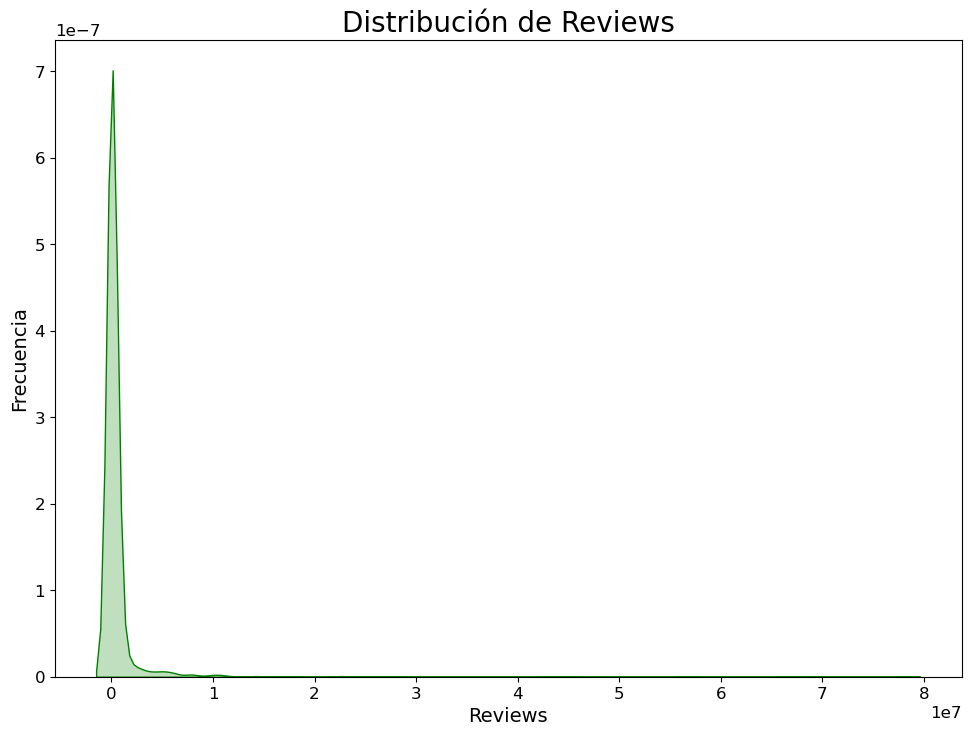

In [584]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(Apps.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frecuencia")
plt.title('Distribución de Reviews',size = 20)

# Size

In [585]:
Apps.Size.unique() # Vemos los valores únicos de size

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [586]:
Apps.Size.value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

- Quitamos las K y la M con sus respectivos valores en números 

In [587]:
Apps.Size = Apps.Size.replace("M", "000",regex=True)
Apps.Size = Apps.Size.replace("k", "",regex=True)
Apps.Size = Apps.Size.replace("\+", "",regex=True)
Apps.Size = Apps.Size.replace(",", "",regex=True)

- Pasaremos las filas que son 'Varies with device' por nulos para luego rellenarlos con la media 

In [588]:
Apps.Size.replace('Varies with device', np.nan, inplace = True ) 

- Convertimos la columna en float


In [589]:
Apps['Size'] = Apps['Size'].astype(float)

In [590]:
media_size = Apps.Size.mean()

Apps.Size = Apps.Size.fillna(media_size)

c:\Users\Daniel Paz\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

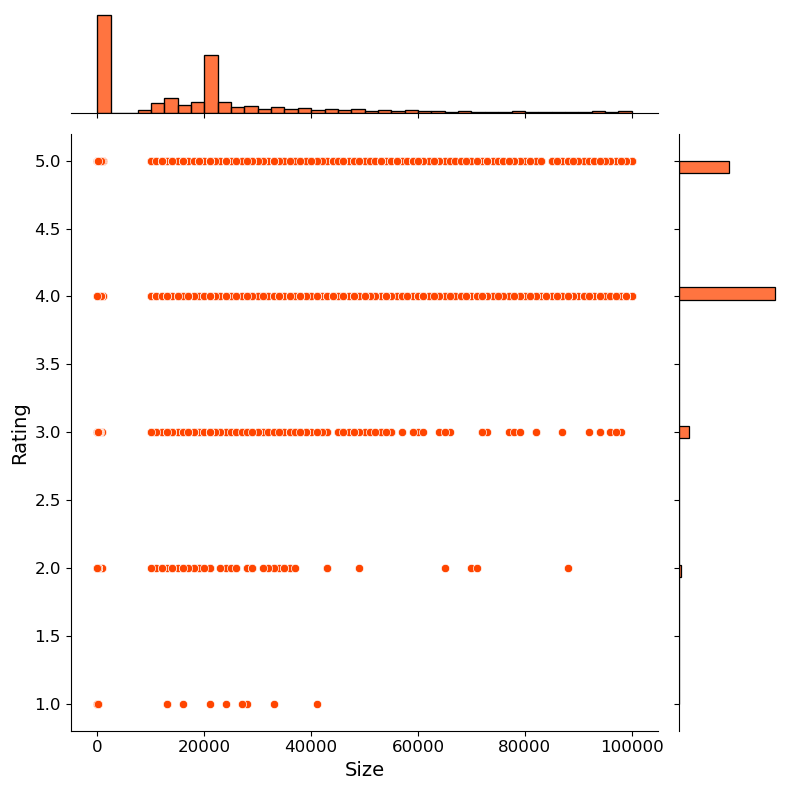

In [591]:
# Tamaño de la aplicación y el rating que reciben (la gráfica sale así devido a la agrupación que se hizo a rating)
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=Apps, size = 8);

# Installs

In [592]:
Apps.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

- Vamos a remplazar la ',' y el '+'

In [593]:
Apps.Installs = Apps.Installs.apply(lambda x: x.replace(',',''))
Apps.Installs = Apps.Installs.apply(lambda x: x.replace('+',''))

- Convertimos los valores a int

In [594]:
Apps.Installs = Apps.Installs.apply(lambda x: int(x))

In [595]:
Apps.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

Vemos que se aplicó correctamente el reemplazo de strings

Text(0.5, 1.0, 'Instalaciones')

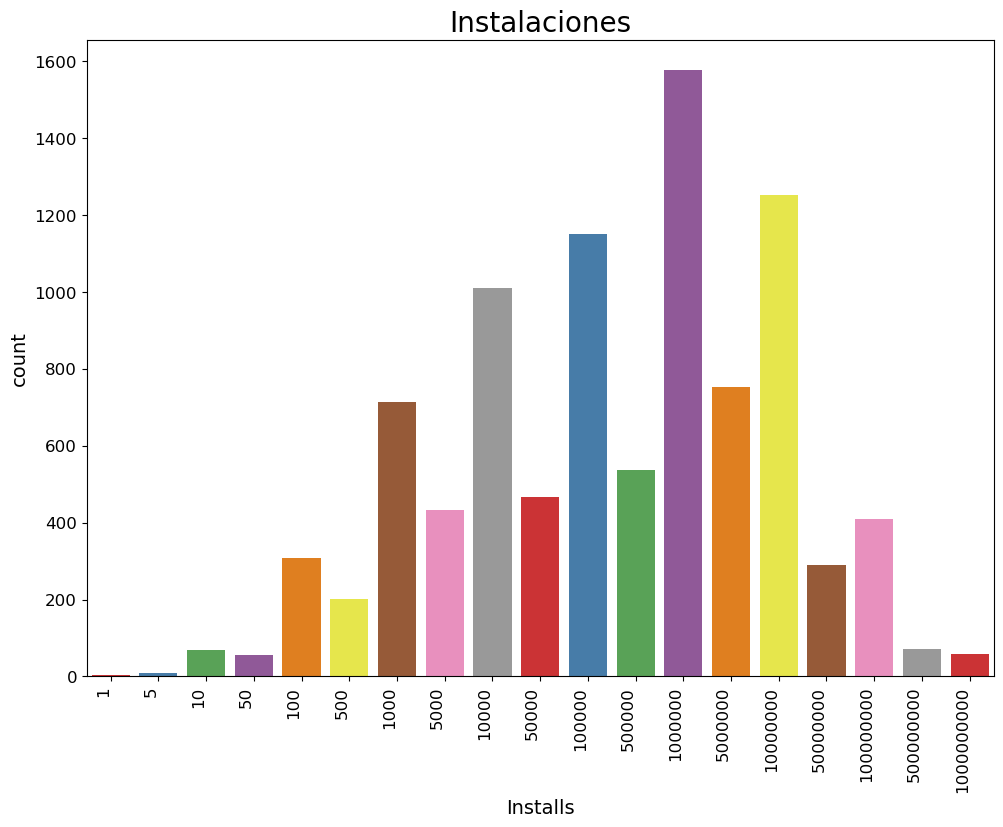

In [596]:
g = sns.countplot(x="Installs",data=Apps ,palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Instalaciones',size = 20)

# Type

In [597]:
Apps.Type.unique()

array(['Free', 'Paid'], dtype=object)

Text(0.5, 1.0, 'Tipo de aplicaciones')

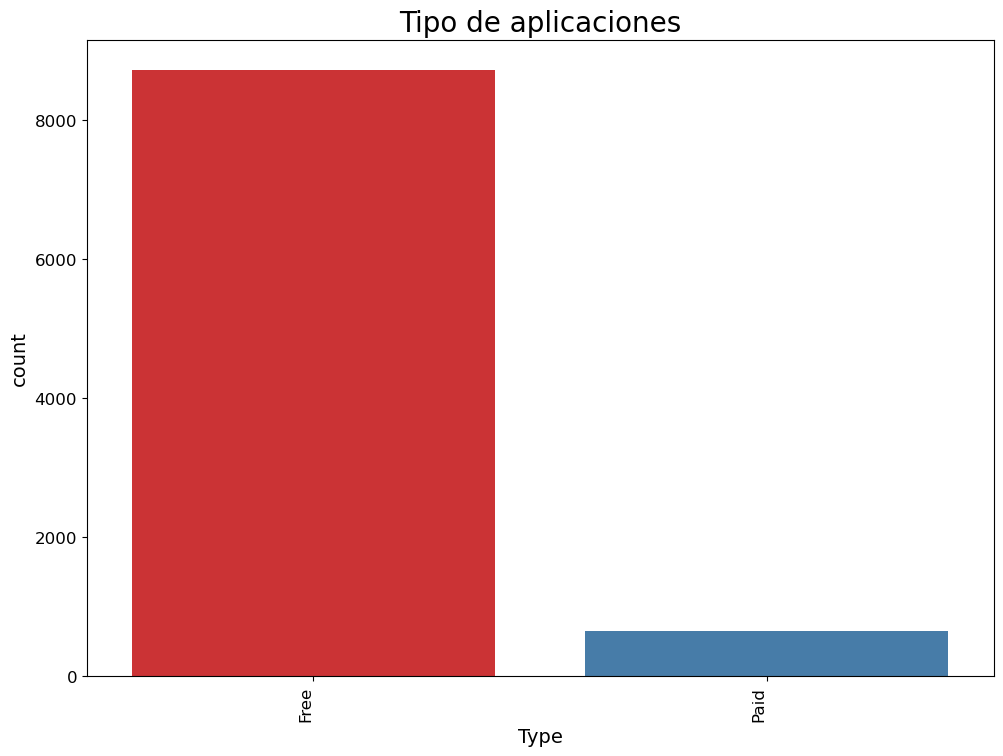

In [598]:
g = sns.countplot(x="Type",data=Apps ,palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Tipo de aplicaciones',size = 20)

# Price

In [599]:
Apps.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

- Remplazamos el string $ y convertimos la columna a float

In [600]:
Apps.Price = Apps.Price.apply(lambda x: x.replace('$',''))


In [601]:
Apps.Price = Apps.Price.apply(lambda x: float(x))

In [602]:
Apps.Price.describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [603]:
Apps.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

Text(0.5, 1.0, 'Rating vs Price')

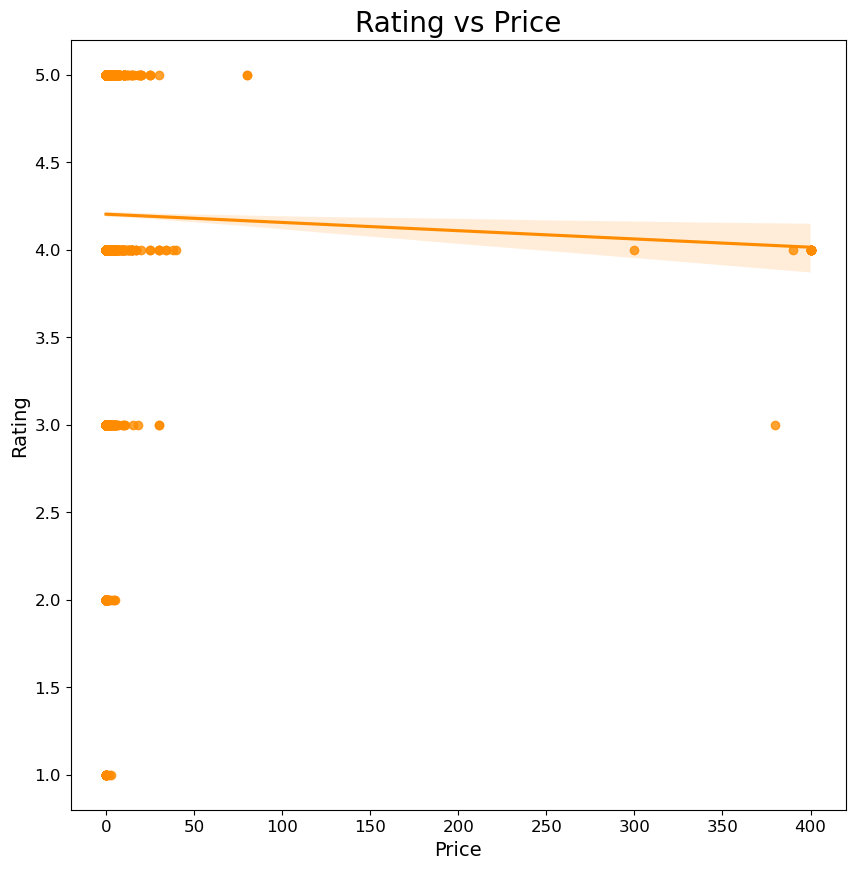

In [604]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=Apps[Apps['Reviews']<1000000]);
plt.title('Rating vs Price',size = 20)

# Content Rating

In [605]:
Apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [606]:
Apps['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

- Unrated lo vamos a cambiar por Everyone (antes lo eliminé y daba problemas la columna)

In [607]:
Apps['Content Rating'] = Apps['Content Rating'].replace("Unrated", 'Everyone').replace(np.nan, 'Everyone')
Apps['Content Rating'].value_counts()

Everyone           7421
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

# Genres

In [608]:
print( len(Apps['Genres'].unique()) , "generos")

print("\n", Apps['Genres'].unique())

115 generos

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educat

# Vemos la matriz de correlación

In [609]:
corr_matrix = Apps.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating      1.000000
Reviews     0.067331
Size        0.063020
Installs    0.024492
Category    0.011683
Price      -0.013528
Name: Rating, dtype: float64

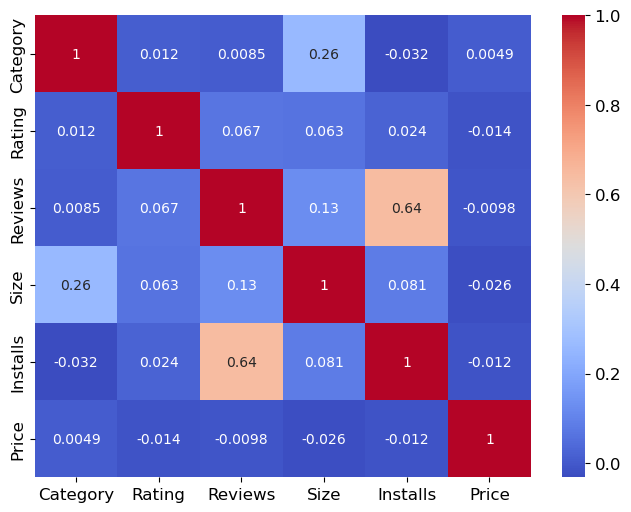

In [610]:
plt.figure(figsize=(8, 6))

# Utilizar la función heatmap de Seaborn para pintar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostrar la figura
plt.show()

## Vamos con la codificación de las columnas 

In [611]:
# Get_dummies nos realizará la codificación binaria 
Apps_encoded = pd.get_dummies(Apps[['Type','Content Rating','Genres']])

# Unimos el dataframe codificado con el original
Apps_encoded_df = pd.concat([Apps, Apps_encoded], axis=1)

# Eliminamos las columnas para que no se repliquen
Apps = Apps_encoded_df.drop(['Type','Content Rating','Genres'], axis=1)
Apps

,Category,Rating,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,0.006620,4.0,159,19000.00000,10000,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.006620,4.0,967,14000.00000,500000,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.006620,5.0,87510,8.70000,5000000,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.006620,5.0,215644,25000.00000,50000000,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.006620,4.0,967,2.80000,100000,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0.186526,4.0,7,2.60000,500,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10836,0.186526,5.0,38,53000.00000,5000,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10837,0.186526,5.0,4,3.60000,100,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10839,0.019005,5.0,114,21091.25152,1000,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vemos como quedó el dataframe final

In [612]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Columns: 128 entries, Category to Genres_Word
dtypes: float64(4), int64(2), uint8(122)
memory usage: 1.8 MB


# Pasamos la columna 'Rating' a string

In [613]:
Apps.Rating = Apps.Rating.astype(str)
Apps.Rating.value_counts()

4.0    5678
5.0    2955
3.0     604
2.0     109
1.0      20
Name: Rating, dtype: int64

# Dividimos en train y test 

In [614]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(Apps, test_size=0.20) # El 20% será para testear el modelo
len(X_train), len(X_test)

(7492, 1874)

In [615]:
y_train = X_train["Rating"].copy() # Rating va a ser nuestra y

X_train = X_train.drop("Rating", axis=1) # quitamos ese valor de nuestro train

# Comenzamos a evaluar

Importes de las medidas de cálculo

In [616]:
from sklearn.metrics import precision_score, recall_score;
from sklearn.metrics import roc_auc_score;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import f1_score;

Importes de los algoritmos

In [617]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier;
from sklearn.svm import SVC

- SGDClassifier

In [618]:
sgd_clf = SGDClassifier(max_iter=1000, random_state=42)  # Clasificador; el hiperparámetro max_iter hace que ocurran 1000 iteraciones
sgd_clf.fit (X_train, y_train)

SGDClassifier(random_state=42)

In [623]:
sgd_predict = cross_val_predict(sgd_clf,
                                X_train, 
                                y_train, 
                                cv=5)

sgd_precision = precision_score  (y_train, sgd_predict, average=None)
sgd_recall    = recall_score     (y_train, sgd_predict, average=None)

# Nos muestra los valores de cada rating(redondeados a 3 decimales) y la media de todos
print(f"Precision:","\t", np.round(sgd_precision,3), np.mean(sgd_precision))
print(f"Recall:"         ,"\t", np.round(sgd_recall,3), np.mean(sgd_recall))

Precision: 	 [0.002 0.    0.11  0.651 0.375] 0.2276003016440506
Recall: 	 [0.056 0.    0.026 0.712 0.285] 0.21577485872550248


- RandomForestClassifier

In [620]:
forest_clf = RandomForestClassifier (n_estimators=100, random_state=42) # n_estimators çcantidad de árboles a crear
forest_clf.fit (X_train, y_train) 

RandomForestClassifier(random_state=42)

In [621]:
forest_predict = cross_val_predict(forest_clf,
                                X_train, 
                                y_train, 
                                cv=5)

forest_precision = precision_score  (y_train, forest_predict, average=None)
forest_recall    = recall_score     (y_train, forest_predict, average=None)

print("Precisión:","\t", np.round(forest_precision,3), np.mean(forest_precision));
print("Recall:","\t",    np.round(forest_recall,   3), np.mean(forest_recall));

Precisión: 	 [0.    0.13  0.253 0.719 0.627] 0.3458195959970759
Recall: 	 [0.    0.034 0.117 0.835 0.52 ] 0.30137229010082595


- SVC

In [622]:
svc_clf = SVC(gamma="auto", random_state=42) # gamma="auto": Este parámetro controla la amplitud del kernel (un tipo de función matemática que mide la similitud entre pares de puntos de datos).
svc_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [625]:
svc_predict = cross_val_predict(svc_clf,
                                X_train, 
                                y_train, 
                                cv=5)

svc_precision = precision_score  (y_train, svc_predict, average=None)
svc_recall    = recall_score     (y_train, svc_predict, average=None)

print("Precisión:","\t", np.round(svc_precision,3), np.mean(svc_precision));
print("Recall:","\t",    np.round(svc_recall,   3), np.mean(svc_recall));

Precisión: 	 [0.    0.75  0.364 0.645 0.649] 0.481383809890697
Recall: 	 [0.    0.034 0.016 0.963 0.184] 0.23948907518868728


c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluando con los datos de testeo

In [626]:
y_test = X_test["Rating"].copy()
X_test = X_test.drop("Rating", axis=1)

- Utilizaremos el SCV y el RandomForestClassifier, ya que son los que mejor resultado dieron

- SVC

In [628]:
svc_predict_test = cross_val_predict(svc_clf,
                                    X_test, 
                                    y_test, 
                                    cv=5)

svc_precision_test = precision_score  (y_test, svc_predict_test, average=None)
svc_recall_test    = recall_score     (y_test, svc_predict_test, average=None)

print("Precisión:","\t", np.round(svc_precision_test,3), np.mean(svc_precision_test));
print("Recall:","\t",    np.round(svc_recall_test,   3), np.mean(svc_recall_test));

c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Precisión: 	 [0.    0.    0.    0.625 0.518] 0.22861449665582975
Recall: 	 [0.    0.    0.    0.946 0.138] 0.2167529581529582


c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- RandomForestClassifier

In [629]:
forest_predict_test = cross_val_predict(forest_clf,
                                        X_test, 
                                        y_test, 
                                        cv=5)

forest_precision_test = precision_score  (y_test, forest_predict_test, average=None)
forest_recall_test    = recall_score     (y_test, forest_predict_test, average=None)

print("Precisión:","\t", np.round(forest_precision_test,3), np.mean(forest_precision_test));
print("Recall:","\t",    np.round(forest_recall_test,   3), np.mean(forest_recall_test));

c:\Users\Daniel Paz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Precisión: 	 [0.    0.    0.077 0.686 0.566] 0.2658426355320221
Recall: 	 [0.    0.    0.027 0.816 0.451] 0.2589142857142857


Como conclusión podemos ver que los modelos son mejores prediciendo las apps con rating de 4 y 5. Pero que para los demás ratings no son tan precisos 